In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/Shareddrives/CSE544_Project/

/content/drive/Shareddrives/CSE544_Project


In [ ]:
ls Exploratory/flight_dataset/Flights_2021

april.csv  dec.csv  jan.csv   june.csv   may.csv  oct.csv
aug.csv    feb.csv  july.csv  march.csv  nov.csv  sep.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

### 2021 Flights Data preprocessing

In [ ]:
path = 'Exploratory/flight_dataset/Flights_2021'
csv_files = glob.glob(os.path.join(path, "*.csv"))
df = pd.concat(map(pd.read_csv, csv_files), ignore_index = True)

Sorting the Flights data by Date

In [ ]:
df['Date'] = pd.to_datetime(df['FL_DATE'])
df = df.sort_values(by='Date')

### CASES dataset preprocessing

1. read COVID19 cases data
2. Select 2021 data
3. Sort Values by Date
4. Calculate total cases of every month by using groupby feature

In [ ]:
df_cases = pd.read_csv('covid_dataset/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')

In [ ]:
df_cases['Date'] = pd.to_datetime(df_cases['submission_date'])

In [ ]:
df_cases = df_cases[(df_cases['Date'] >= '2021-01-01') & (df_cases['Date'] < '2022-01-01')]
df_cases = df_cases.sort_values(by='Date')
df_cases = df_cases.groupby('Date').sum().reset_index()
df_cases['MONTH'] = df_cases['Date'].dt.month

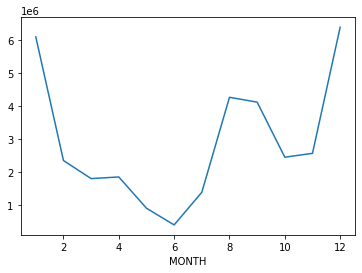

In [ ]:
df_cases.groupby('MONTH').sum()['new_case'].plot()

___

### Vaccination data preprocessing


1. read Vaccination data
2. Select 2021 data
3. Sort Values by Date
4. Calculate cumulative total distribution upto each month by using groupby feature

In [ ]:
df_vac = pd.read_csv('covid_dataset/COVID-19_Vaccinations_in_the_United_States_Jurisdiction.csv')

In [ ]:
df_vac["Date"] = pd.to_datetime(df_vac['Date'])
df_vac = df_vac[(df_vac['Date'] >= '2021-01-01') & (df_vac['Date'] < '2022-01-01')]
df_vac = df_vac.sort_values(by='Date')

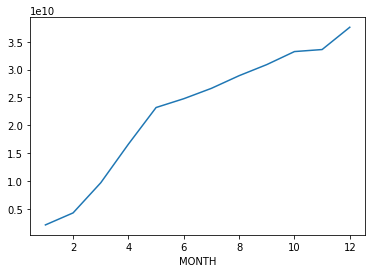

In [ ]:
df_vac = df_vac.groupby('Date').sum().reset_index()
df_vac['MONTH'] = df_vac['Date'].dt.month
df_vac.groupby('MONTH').sum()['Distributed'].plot()

____

### Combining the 3 Datasets

In [ ]:
df_monthly= df[['MONTH', 'CANCELLED']]
df_monthly = df_monthly.groupby('MONTH').sum()

In [ ]:
df_monthly['total'] = df.groupby(['MONTH']).count()['CANCELLED']

In [ ]:
df_monthly['Distributed'] = df_vac.groupby('MONTH').sum()['Distributed']
df_monthly['Cases'] = df_cases.groupby('MONTH').sum()['new_case']
df_monthly = df_monthly[['total', 'Distributed', 'Cases']]
df_monthly

,total,Distributed,Cases
MONTH,,,
1,361428,2137667200,6085925
2,332468,4294578070,2342664
3,444476,9697993400,1796134
4,450637,16628575010,1845334
5,495544,23196304765,898846
6,546124,24773496500,393323
7,583258,26636602530,1381778
8,579179,28904105495,4257357
9,538051,30893162470,4111442


Calulate Correlation between the Vaccine distributed, Total Flights Scheduled and Covid Cases

In [ ]:
df_monthly[['Distributed', 'total', 'Cases']].corr()

,Distributed,total,Cases
Distributed,1.000000,0.920566,0.059443
total,0.920566,1.000000,-0.099813
Cases,0.059443,-0.099813,1.000000


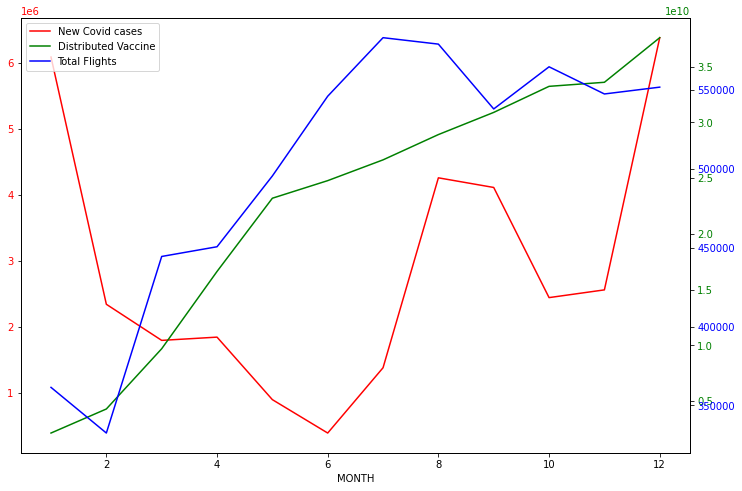

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

p1, = ax.plot(df_monthly['Cases'], color='red', label='new cases')
ax.tick_params(axis='y', labelcolor='red')
ax.set_xlabel('MONTH')

ax2 = ax.twinx()
p2, = ax2.plot(df_monthly['Distributed'], color='green', label='Distributed')
ax2.tick_params(axis='y', labelcolor='green')

ax3 = ax.twinx()
p3, = ax3.plot(df_monthly['total'], color='blue')
ax3.tick_params(axis='y', labelcolor='blue')

plt.legend(handles=[p1,p2,p3], labels=['New Covid cases','Distributed Vaccine','Total Flights'],fontsize = 10)
plt.show()

### Inference

- Huge amount of data involving Vaccine data, Flight data and covid cases of entire country of United States of the year 2021 was considered.
- The Total Flights scheduled has an excellent positive correlation with vaccination distributed.
- Over the year as more people were vaccinated, more flights were being scheduled which is justified by the Correlation of 0.92
- To make sure that the effect is not just because of decreasing Cases, we also consider the covid cases data. We observe that, covid cases does not have any significant correlation with Total flights scheduled. ( -0.09 )
- This confirms that total flights is not being influenced by the rise and fall of covid cases but its correlated to the vaccine.

___

### Chi-square Test: 
(Please check the Inference 3 pdf document for the Chi square test analysis)

In [ ]:
df_la_flight_2020 = pd.read_csv('Exploratory/flight_dataset/LA_2020_flights.csv')
df_la_flight_2021 = pd.read_csv('Exploratory/flight_dataset/LA_2021_flights.csv')

In [ ]:
df_md_flight_2020 = pd.read_csv('Exploratory/flight_dataset/MD_2020_flights.csv')
df_md_flight_2021 = pd.read_csv('Exploratory/flight_dataset/MD_2021_flights.csv')

In [ ]:
print(df_md_flight_2021.shape)
print(df_la_flight_2021.shape)

(67818, 21)
(51303, 21)


In [ ]:
df_la_flight_2020['CANCELLED'].value_counts()

0    26132
1     3495
Name: CANCELLED, dtype: int64

In [ ]:
df_la_flight_2021['CANCELLED'].value_counts()

0.0    50236
1.0     1067
Name: CANCELLED, dtype: int64

In [ ]:
df_md_flight_2020['CANCELLED'].value_counts()

0    34117
1     4406
Name: CANCELLED, dtype: int64

In [ ]:
df_md_flight_2021['CANCELLED'].value_counts()

0.0    65999
1.0     1819
Name: CANCELLED, dtype: int64

In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic &> /dev/null
!jupyter nbconvert --to pdf /content/drive/Shareddrives/CSE544_Project/Exploratory/Inference_2and3.ipynb  &> /dev/null